<a href="https://colab.research.google.com/github/elenaajayi/Computer-Vision-Fundamentals---CUS-754/blob/main/Problem_Set_06/Problem_set_06_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is part the of Dr. Christoforos Christoforou's course materials. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials or any of their derivatives without the instructor's express written consent.

# Problem Set 06 - Segmentation
**Professor:** Dr. Christoforos Christoforou

For this problem set you will need the following libraries, which are pre-installed with the colab environment:

* [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
* [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
* [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
* [Skimage](https://scikit-image.org/) is a library which supports image processing applications on python.
* [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.
* [Sklearn](https://scikit-learn.org/stable/) is a machine learning library.

You can load them using the following import statement:

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy import ndimage as nd
from skimage.filters import roberts, sobel, scharr, prewitt



## Image Sources
For this problem set you are asked to load and pre-process images. You can choose to use your own images, or download images from the following sources:

**Image source examples**

- [Place Kitten API](https://placekitten.com/) - use the base Place Kitten URL followed by a width and height separated by backslashes ''/''. For example, use the URL `https://placekitten.com/500/300` to fetch a cat image with a width of 500px and height of 300px.

- [Lorem Picsum Photos API ](https://picsum.photos/images) - generates random images from the web.

- [NC State University Libraries Special Collections](https://d.lib.ncsu.edu/collections/catalog) - browse the site to find an image thumbnail. Right-click on the thumbnail and select "Copy Image Address". The address will look like this: `https://iiif.lib.ncsu.edu/iiif/0051230/square/300,/0/default.jpg`. Replace the word "square" with the word "full" and replace "300" with "800" to access the full image at a width of 800px.

- [Google Image search](https://www.google.com/imghp?hl=en) - search for an image. Left-click one of the returned images, then right-click on the full image, and then select "Copy Image Address".


## Exercise 1 : Segmentation in RGB space

The code below illustrates how to use OpenCV to segment an image based on the RBG color space. The first part of the code prepares the image and represents each of its pixels as a vector in the RGB space. The second part of the code applies the K-Means clustering algorithm from sklearn to identify clusters in the color space. The extracted clusters denote the segmented regions in the image.

**Task 1.1**
As part of this first exercise, try to reproduce the code in the cell below; you can use this sample code as a reference to implement the exercises that follow in this problem set.

```python

# Load an image and represent it as a vector space.

url = "https://placekitten.com/255/256"

# Read image
img = io.imread(url)

# convert to RGB from BGR
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))

# convert to float
pixel_values = np.float32(pixel_values)

# Notice the shape of pixel_values
print(pixel_values.shape)


#
# Cluster pixels in the RGB space
#

# Apply k-means clustering on the color space.
kmeans = KMeans(n_clusters=10, random_state=0).fit(pixel_values)

# Convert the cluster labels into a 2D array.
segment_shape = (image.shape[0], image.shape[1])
segmented = kmeans.labels_.reshape(segment_shape)

# Display the images.
fig = plt.figure(figsize=(100,100))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(segmented,cmap='gray')

```



(750000, 3)


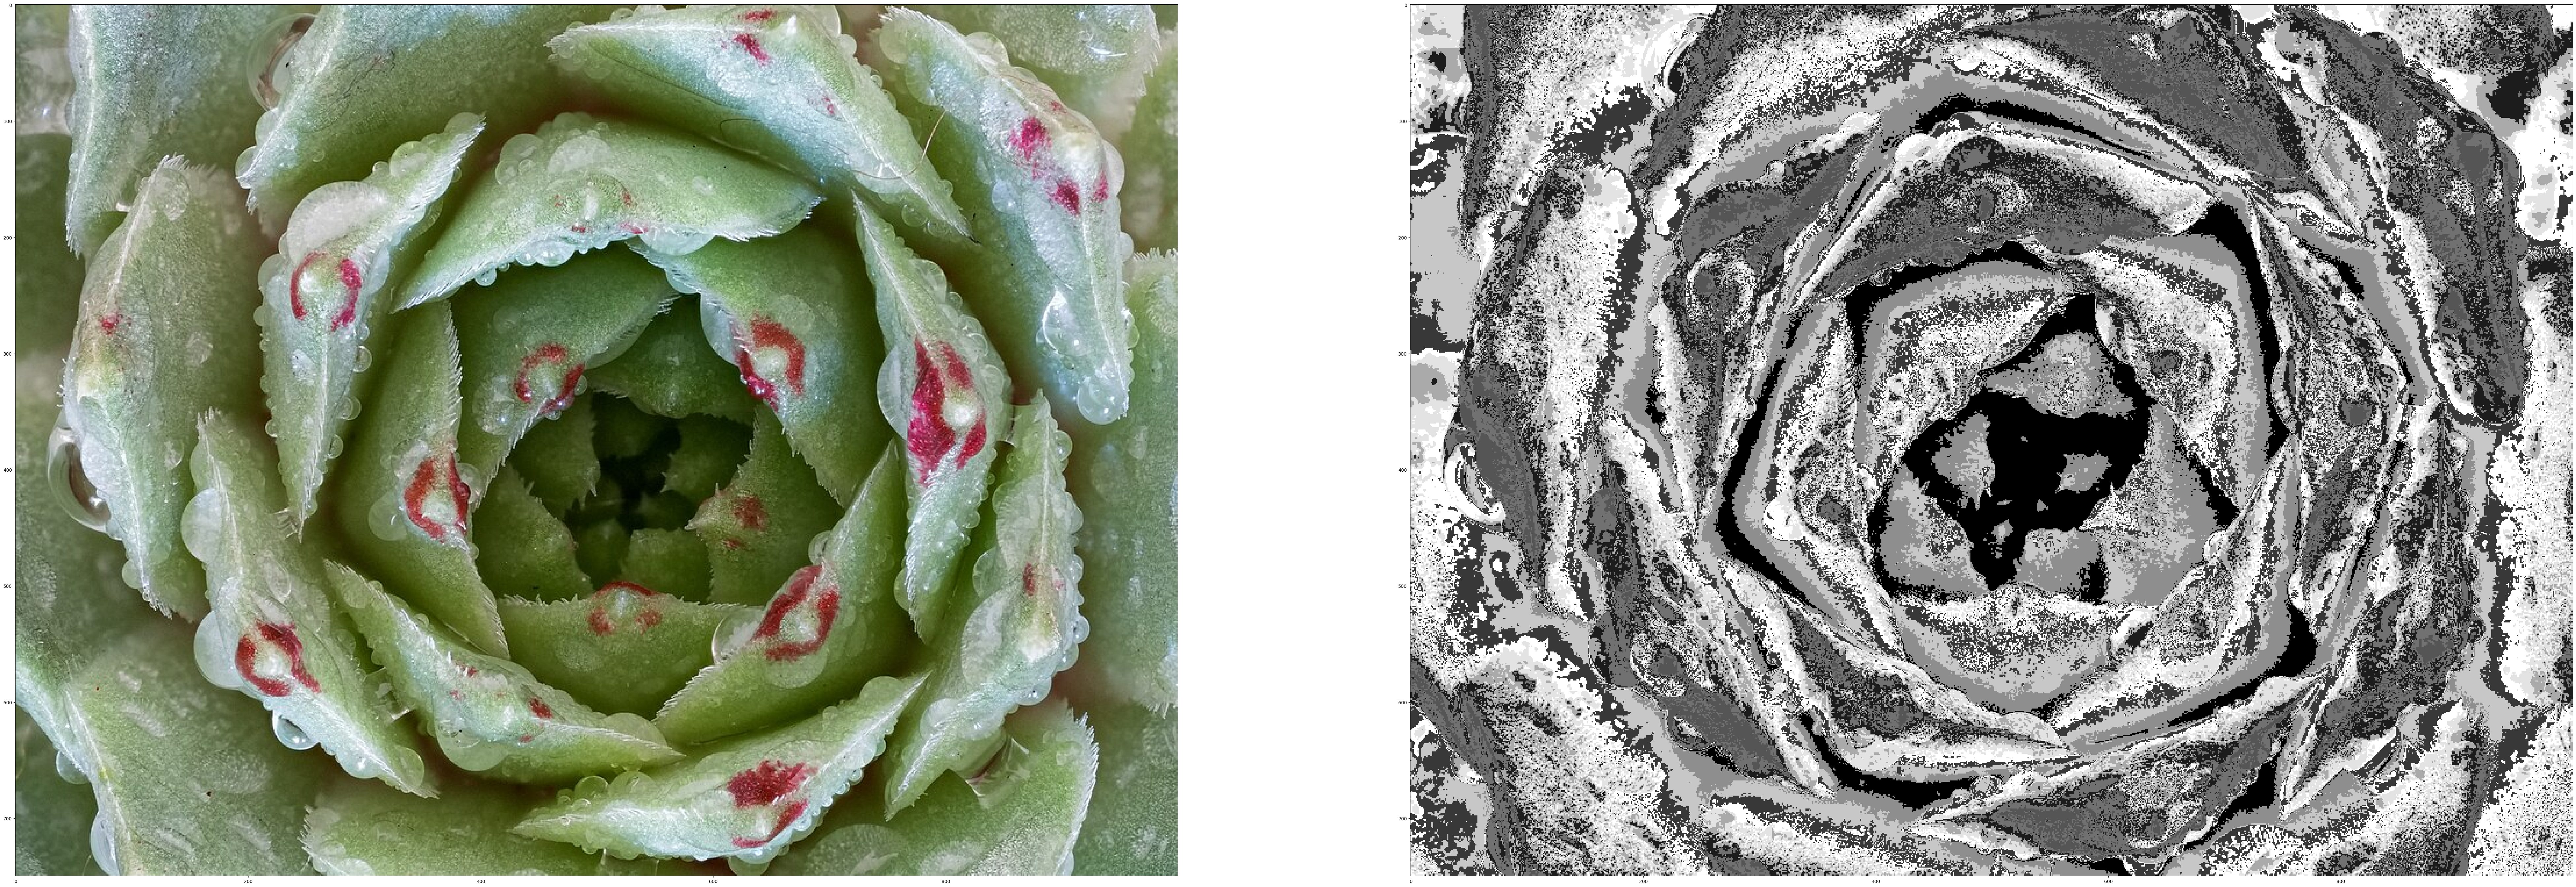

In [12]:
# Reproduce the example above, use different image than the one provided in the example.



# Load an image and represent it as a vector space.

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Echeveria_A7CR_02866-90_zsp.jpg/1000px-Echeveria_A7CR_02866-90_zsp.jpg"

# Read image from the url
img = io.imread(url)

# convert to RGB from BGR (opencv uses bgr by default)
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
# basically, each pixel becomes a data point with 3 features (red, green, blue)
pixel_values = image.reshape((-1, 3))

# convert to float (kmeans clustering works better with floats)
pixel_values = np.float32(pixel_values)

# Notice the shape of pixel_values (it'll be a long list of pixels, each with 3 color values)
print(pixel_values.shape)


# Cluster pixels in the RGB space

# Apply k-means clustering on the color space.
# we're grouping similar colors together into 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0).fit(pixel_values)

# Convert the cluster labels into a 2D array.
# so we can see the segments in the image
segment_shape = (image.shape[0], image.shape[1])
segmented = kmeans.labels_.reshape(segment_shape)

# Display the images.
# let's see the original and segmented images side-by-side
fig = plt.figure(figsize=(100,100))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(segmented,cmap='gray')

**Task 1.2**: Run the segmentation example above using different 'number of clusters' in the k-means algorithm. Show how the segmented image changes for each parameter configuration by displaying the original image, and the segmented image for each parameter configuration.



Original image shape: (577, 700, 3)
Pixel values shape: (403900, 3)


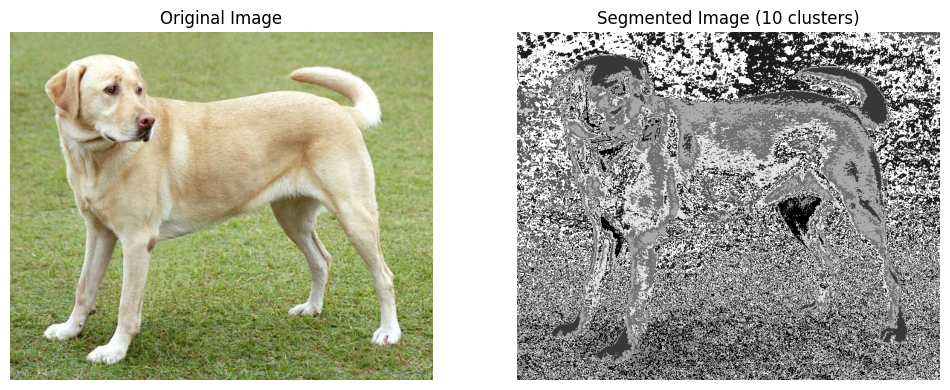

In [ ]:
#
# Use this cell to implement Task 1.2

#import libraries
import matplotlib.pyplot as plt

# Use a different image: Yellow Labrador
url = "https://upload.wikimedia.org/wikipedia/commons/2/26/YellowLabradorLooking_new.jpg"

# Read the image from the URL
img = io.imread(url)

# Note: skimage.io.imread returns the image in RGB order,
# so there's no need to convert from BGR to RGB.
image = img

# Display the shape of the pixel values before reshaping
print("Original image shape:", image.shape)

# Reshape the image to a 2D array of pixels with 3 color channels (RGB)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
print("Pixel values shape:", pixel_values.shape)

#
# Cluster pixels in the RGB space using k-means clustering
#

# Apply k-means clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0).fit(pixel_values)

# Convert the cluster labels back to the original image shape
segment_shape = (image.shape[0], image.shape[1])
segmented = kmeans.labels_.reshape(segment_shape)

#
# Display the original and segmented images side by side
#
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='gray')
plt.title("Segmented Image (10 clusters)")
plt.axis('off')

plt.show()



**Task 1.3**: Run the segmentation example above, but first filter the image. Try (a) to filter the image using a gaussian filter and show the segmentation results, and (b) filter the image using a median filter (i.e. use `cv.medianBlur` method of OpenCV - see documentation) Show how the segmented image changes for each of these two cases. Output the original image, and the segmented image for each parameter configuration.


Original image shape: (360, 250, 3)
Pixel values shape: (90000, 3)


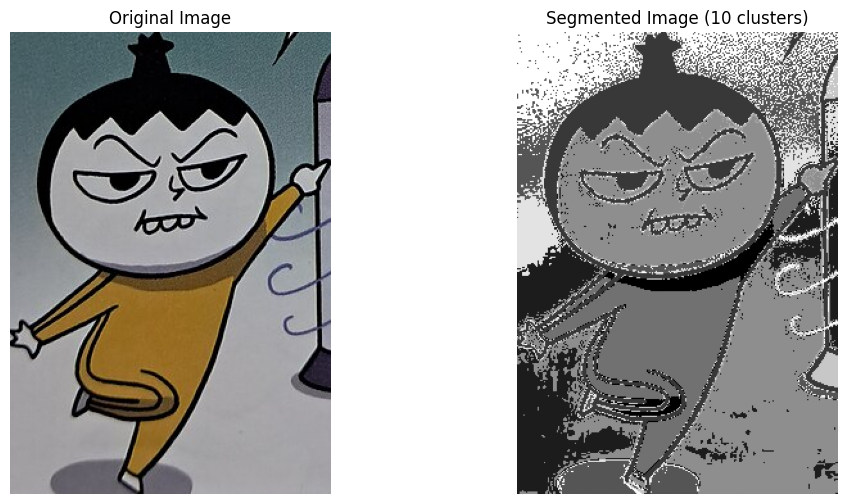

In [14]:
# import the io module from the skimage library
import matplotlib.pyplot as plt  # for displaying images

# load the image of the Yellow Labrador (same as Task 1.2)
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Jung_sin.jpg/250px-Jung_sin.jpg"

# Read the image from the URL
img = io.imread(url)

# Note: skimage.io.imread returns the image in RGB order,
# so there's no need to convert from BGR to RGB.
image = img

# Display the shape of the pixel values before reshaping
print("Original image shape:", image.shape)

# Reshape the image to a 2D array of pixels with 3 color channels (RGB)
# this basically turns each pixel into a data point with red, green, and blue values
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)  # k-means works better with floats
print("Pixel values shape:", pixel_values.shape)  # check out the new shape

#
# Cluster pixels in the RGB space using k-means clustering
#

# Apply k-means clustering with 10 clusters (grouping similar colors together)
kmeans = KMeans(n_clusters=10, random_state=0).fit(pixel_values)

# Convert the cluster labels back to the original image shape
# so we can see the segments in the image
segment_shape = (image.shape[0], image.shape[1])
segmented = kmeans.labels_.reshape(segment_shape)

#
# Display the original and segmented images side by side
#
plt.figure(figsize=(12, 6))  # creating a figure for our plots

plt.subplot(1, 2, 1)  # first subplot: original image
plt.imshow(image)  # show the original image
plt.title("Original Image")  # set the title
plt.axis('off')  # hide the axes (we don't need them)

plt.subplot(1, 2, 2)  # second subplot: segmented image
plt.imshow(segmented, cmap='gray')  # show the segmented image in grayscale
plt.title("Segmented Image (10 clusters)")  # set the title
plt.axis('off')  # hide the axes

plt.show()  # display the figure with both plots

## Exercise 02: Segmentation using filter bank.

When approaching image segmentation as a clustering problem, we need to have a representation of each pixel in some vector space. The color-space (RGB) is not always informative enough to generate meaningful clusters. Alternatively, we can apply several filters in the image to capture the local properties of each pixel and use the resulting vector as a feature representation.

The code below illustrates how to generate such a multi-variate representation by applying different filters.

```python
#
# Load the image
#
url = "https://www.rxwiki.com/sites/files/styles/article_2/public/photo/dreamstime_s_49220741.jpg"
img = io.imread(url)

# Create a panda frame to accumulate the features;
# Each row would be a pixel and each colum will denote a feature.

df = pd.DataFrame()

#
# Feature 1: Add the raw intensity as a feature.
#

# Convert the image to gray-scale, and then into a 1D vector;
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  
df['Original Image'] = img.reshape(-1)    #Add column to original dataframe



#
# Feature 2: Add edge pixels as feature
#

edges = cv.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1  #Add column to original dataframe


#
# Feature 3,4,5: SOBEL edge pixels; Gaussian filter with sigma 3, and sigma 7
#


#SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

#GAUSSIAN with sigma=3

gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3


#
# Add Gabor filters, with different theta, lamda, gamma parameters
#

kernel_idx = 1;
kernels = []
for theta in range(2):   #Define number of thetas
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with 1 and 3 standard deviation
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths.
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
            
                
                gabor_label = 'Gabor' + str(kernel_idx)  #Label Gabor columns as Gabor1, Gabor2, etc.
                # print(gabor_label)
                ksize=9

                # Get gabor kernel, with set parameters.
                kernel = cv.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv.CV_32F)    
                
                # Add kernel to the filter bank.

                kernels.append(kernel)

                #Now filter the image and add values to a new column
                fimg = cv.filter2D(img, cv.CV_8UC3, kernel)

                # Convert the image to one dimensional vector.
                filtered_img = fimg.reshape(-1)

                # Added gabor filters to the data frame.
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                kernel_idx += 1  #Increment for gabor column label


# Here df


```


**Task 2.1**. Try to reproduce the code below in the cell provided below. Inspect the content of df DataFrame and note how many features the filter bank generated.


In [15]:
# Implement Task 2.1 here.

# Import necessary libraries (if not already imported)
import numpy as np
import pandas as pd
import cv2 as cv
from skimage import io
from scipy import ndimage as nd
from skimage.filters import sobel


# Load the image
url = "https://upload.wikimedia.org/wikipedia/commons/d/d2/Turner%2C_Joseph_Mallord_William_-_The_Goddess_of_Discord_Choosing_the_Apple_of_Contention_in_the_Garden_of_the_Hesperides_-_c._1806.jpg"
img = io.imread(url)

# Create a panda frame to accumulate the features
df = pd.DataFrame()

# Feature 1: Add the raw intensity as a feature
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
df['Original Image'] = img_gray.reshape(-1)

# Feature 2: Add edge pixels as feature
edges = cv.Canny(img_gray, 100, 200)
df['Canny Edge'] = edges.reshape(-1)

# Feature 3,4,5: SOBEL, Gaussian with sigma 3, and sigma 7
edge_sobel = sobel(img_gray)
df['Sobel'] = edge_sobel.reshape(-1)

gaussian_img1 = nd.gaussian_filter(img_gray, sigma=3)
df['Gaussian s3'] = gaussian_img1.reshape(-1)

gaussian_img2 = nd.gaussian_filter(img_gray, sigma=7)
df['Gaussian s7'] = gaussian_img2.reshape(-1)

# Add Gabor filters
kernel_idx = 1
for theta in range(2):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for lamda in np.arange(0, np.pi, np.pi / 4):
            for gamma in (0.05, 0.5):
                gabor_label = 'Gabor' + str(kernel_idx)
                ksize=9
                kernel = cv.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv.CV_32F)
                fimg = cv.filter2D(img_gray, cv.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img
                kernel_idx += 1

# Inspect the DataFrame
print("Shape of the DataFrame:", df.shape)
print("Number of features:", df.shape[1])
# You can also view the first few rows of the DataFrame using df.head()

Shape of the DataFrame: (1204896, 37)
Number of features: 37


**Task 2.2** Apply k-means clustering of the filter bank feature space you generated above and display the resulting segmented image.


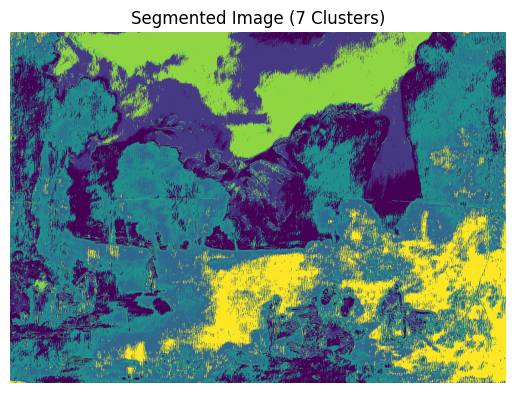

In [16]:
# Implement Task 2.2 here

from sklearn.cluster import KMeans  # using k-means for clustering
import matplotlib.pyplot as plt  # for displaying the image
import numpy as np
import pandas as pd
import cv2 as cv
from skimage import io
from scipy import ndimage as nd
from skimage.filters import sobel


# load the image
url = "https://upload.wikimedia.org/wikipedia/commons/d/d2/Turner%2C_Joseph_Mallord_William_-_The_Goddess_of_Discord_Choosing_the_Apple_of_Contention_in_the_Garden_of_the_Hesperides_-_c._1806.jpg"
img = io.imread(url)

# create a panda frame to accumulate the features
df = pd.DataFrame()

# feature 1: Add the raw intensity as a feature
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
df['Original Image'] = img_gray.reshape(-1)

# feature 2: Add edge pixels as feature
edges = cv.Canny(img_gray, 100, 200)
df['Canny Edge'] = edges.reshape(-1)

# feature 3,4,5: SOBEL, Gaussian with sigma 3, and sigma 7
edge_sobel = sobel(img_gray)
df['Sobel'] = edge_sobel.reshape(-1)

gaussian_img1 = nd.gaussian_filter(img_gray, sigma=3)
df['Gaussian s3'] = gaussian_img1.reshape(-1)

gaussian_img2 = nd.gaussian_filter(img_gray, sigma=7)
df['Gaussian s7'] = gaussian_img2.reshape(-1)

# adding gabor filters
kernel_idx = 1
for theta in range(2):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for lamda in np.arange(0, np.pi, np.pi / 4):
            for gamma in (0.05, 0.5):
                gabor_label = 'Gabor' + str(kernel_idx)
                ksize=9
                kernel = cv.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv.CV_32F)
                fimg = cv.filter2D(img_gray, cv.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img
                kernel_idx += 1

#apply kmeans clustering
n_clusters = 7 # let's try with 7 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0) #initializing the kmeans object
s = kmeans.fit(df) #fitting kmeans to the feature df

#cluster labels for each pixel

labels = kmeans.labels_

# Reshape labels to the original image shape

segmented_image = labels.reshape(img_gray.shape)

# display the segmented image
plt.imshow(segmented_image, cmap='viridis')  # Display image using 'viridis' colormap
plt.title(f"Segmented Image ({n_clusters} Clusters)")  # Set title
plt.axis('off')  # hiding x and y axes
plt.show()  # Show the plot.

**Task 2.3** Try different parameter configurations for your filter bank and clustering algorithm and apply the filter-bank segmentation procedure on an image of your choosing. Try to identify a parameter configuration that results in a reasonable segmentation.


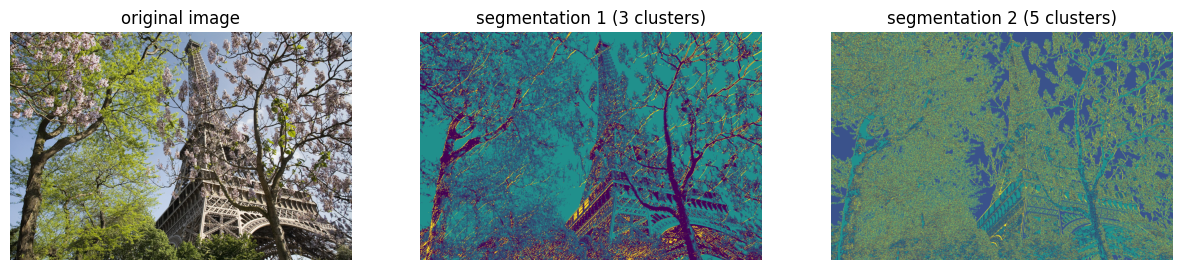

In [17]:
import numpy as np
import pandas as pd
import cv2 as cv
from skimage import io
from scipy import ndimage as nd
from skimage.filters import sobel
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the image
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Paris_-_The_Eiffel_Tower_in_spring_-_2307.jpg/2560px-Paris_-_The_Eiffel_Tower_in_spring_-_2307.jpg"
img = io.imread(url)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#  Experiment with different parameter configurations

# Configuration 1 - trying with some initial values
theta_range1 = (0, 2)
sigma_values1 = (1, 3)
lambda_range1 = (0, np.pi, np.pi / 4)
gamma_values1 = (0.05, 0.5)
gaussian_sigmas1 = (3, 7)
canny_thresholds1 = (100, 200)
n_clusters1 = 3

# Configuration 2 - let's tweak things a bit for comparison
theta_range2 = (0, 4)  # increased theta range for more orientations
sigma_values2 = (1, 5)  # trying a wider range of sigma values
lambda_range2 = (0, np.pi, np.pi / 2)  # adjusting the lambda step
gamma_values2 = (0.05, 0.75)  # increasing gamma a little
gaussian_sigmas2 = (5, 11) # using larger gaussian sigmas for more smoothing
canny_thresholds2 = (50, 150)  # changing the canny edge detection thresholds
n_clusters2 = 5  # let's try with more clusters this time



#  Feature Extraction and Segmentation for Configuration 1
def extract_features(image, theta_range=(0, 2), sigma_values=(1, 3), lambda_range=(0, np.pi, np.pi / 4), gamma_values=(0.05, 0.5), gaussian_sigmas=(3, 7), canny_thresholds=(100, 200)):
    """
    extracts features from an image using a filter bank.
    """

    df = pd.DataFrame()
    df['Original Image'] = image.reshape(-1)  # the original image as a feature

    edges = cv.Canny(image, canny_thresholds[0], canny_thresholds[1])
    df['Canny Edge'] = edges.reshape(-1)  # add the canny edges as a feature

    edge_sobel = sobel(image)
    df['Sobel'] = edge_sobel.reshape(-1)  # and sobel edges too

    # trying gaussian blurs with different sigmas
    for sigma in gaussian_sigmas:
        gaussian_img = nd.gaussian_filter(image, sigma=sigma)
        df[f'Gaussian s{sigma}'] = gaussian_img.reshape(-1)

    # now for gabor filters with various settings
    kernel_idx = 1
    for theta in range(theta_range[0], theta_range[1]):
        theta = theta / 4. * np.pi
        for sigma in sigma_values:
            for lamda in np.arange(*lambda_range):
                for gamma in gamma_values:
                    gabor_label = f'Gabor{kernel_idx}'
                    ksize = 9  # using default filter size
                    kernel = cv.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv.CV_32F)
                    fimg = cv.filter2D(image, cv.CV_8UC3, kernel)
                    filtered_img = fimg.reshape(-1)
                    df[gabor_label] = filtered_img
                    kernel_idx += 1

    return df
features_df1 = extract_features(img_gray, theta_range=theta_range1, sigma_values=sigma_values1, lambda_range=lambda_range1, gamma_values=gamma_values1, gaussian_sigmas=gaussian_sigmas1, canny_thresholds=canny_thresholds1)
kmeans1 = KMeans(n_clusters=n_clusters1, random_state=0)  # using k-means for clustering
kmeans1.fit(features_df1)  # fitting the model to our features
segmented_image1 = kmeans1.labels_.reshape(img_gray.shape)  # reshaping for display

#  Feature Extraction and Segmentation for Configuration 2
features_df2 = extract_features(img_gray, theta_range=theta_range2, sigma_values=sigma_values2, lambda_range=lambda_range2, gamma_values=gamma_values2, gaussian_sigmas=gaussian_sigmas2, canny_thresholds=canny_thresholds2)
kmeans2 = KMeans(n_clusters=n_clusters2, random_state=0)  # initializing k-means again with diff params
kmeans2.fit(features_df2)  # fitting to the new features
segmented_image2 = kmeans2.labels_.reshape(img_gray.shape)  # reshaping for display

#  Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)  # showing the original image
plt.title("original image")
plt.axis('off')  # hiding axis ticks

plt.subplot(1, 3, 2)
plt.imshow(segmented_image1, cmap='viridis')  # showing segmentation with config 1
plt.title(f"segmentation 1 ({n_clusters1} clusters)")
plt.axis('off')  # hiding axis ticks

plt.subplot(1, 3, 3)
plt.imshow(segmented_image2, cmap='viridis')  # showing segmentation with config 2
plt.title(f"segmentation 2 ({n_clusters2} clusters)")
plt.axis('off')  # hiding axis ticks

plt.show()  # finally, displaying everything


Copyright Statement: Copyright © 2020 Christoforou. The materials provided by the instructor of this course, including this notebook, are for the use of the students enrolled in the course. Materials are presented in an educational context for personal use and study and should not be shared, distributed, disseminated or sold in print — or digitally — outside the course without permission. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials as well as any of their derivatives without the instructor's express written consent.